In [222]:
# Import libraries and functions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [223]:
# Function to scale performance metrics
def scaling(DTW_train, DTW_test):
    Max = max(np.max(DTW_train), np.max(DTW_test))
    Min = min(np.min(DTW_train),np.min(DTW_test))
    DTW_train = 19*(DTW_train - Min)/(Max - Min)
    DTW_test = 19*(DTW_test - Min)/(Max - Min)
    return DTW_train, DTW_test


In [224]:
# Function to evaluate separation degree
def score(DTW_train, DTW_test):
    samples_train = DTW_train.shape[1]
    samples_test = DTW_test.shape[1]
    score = 0
    for i in range(samples_train):
        for j in range(samples_test):
            score = score + ((DTW_train[0,i] - DTW_test[0,j])/(DTW_train[0,i] + DTW_test[0,j]))
           
    score = score/(samples_train*samples_test)
    return score
    

In [225]:
def main(filepath_train_bw,filepath_test_bw,filepath_train_with,filepath_test_with,inp,i):
    
    #Number of examples
    samples = 90

    #Load train and test for in-between and within subject case
    DTW_train_bw = np.loadtxt(filepath_train_bw, delimiter = ',')
    DTW_test_bw = np.loadtxt(filepath_test_bw, delimiter = ',')
    DTW_train_with = np.loadtxt(filepath_train_with, delimiter = ',')
    DTW_test_with = np.loadtxt(filepath_test_with, delimiter = ',')

    DTW_train_bw = DTW_train_bw.reshape(1,90)
    DTW_test_bw = DTW_test_bw.reshape(1,90)
    DTW_train_with = DTW_train_with.reshape(1,90)
    DTW_test_with = DTW_test_with.reshape(1,90)
    
    #Scale and evaluate separation degree
    DTW_train_bw, DTW_test_bw = scaling(DTW_train_bw, DTW_test_bw)
    DTW_train_with, DTW_test_with = scaling(DTW_train_with, DTW_test_with)
    score_bw = score(DTW_train_bw, DTW_test_bw)
    score_with = score(DTW_train_with, DTW_test_with)
    print("Separation degree of between case for " + inp + " : " + str(score_bw))
    print("Separation degree of within case for " + inp + " : " + str(score_with))
    samples_Arr = np.arange(1,samples+1).reshape(1,samples)
    
    #Plot DTW vs sequence numbers
    plt.subplot(5,2,i)
    plt.plot(samples_Arr,DTW_train_bw,'go')
    plt.plot(samples_Arr,DTW_test_bw,'ro')
    plt.title('DTW vs sequence numbers between subjects: ' + inp)
   
    plt.subplot(5,2,i+1)
    plt.plot(samples_Arr,DTW_train_with,'go')
    plt.plot(samples_Arr,DTW_test_with,'ro')
    plt.title('DTW vs sequence numbers within subjects: ' + inp)

    return score_bw, score_with


Separation degree of between case for Autoencoder : -0.44818479383414456
Separation degree of within case for Autoencoder : -0.7474427000534409
Separation degree of between case for PCA : -0.3020245960901979
Separation degree of within case for PCA : -0.7034012600056136
Separation degree of between case for Linear - KPCA : -0.3020244776322908
Separation degree of within case for Linear - KPCA : -0.7034007051269885
Separation degree of between case for Poly - KPCA : -0.4200991291677013
Separation degree of within case for Poly - KPCA : -0.7417070582047548
Separation degree of between case for Rbf - KPCA : -0.6806956486621772
Separation degree of within case for Rbf - KPCA : -0.8154172603325957


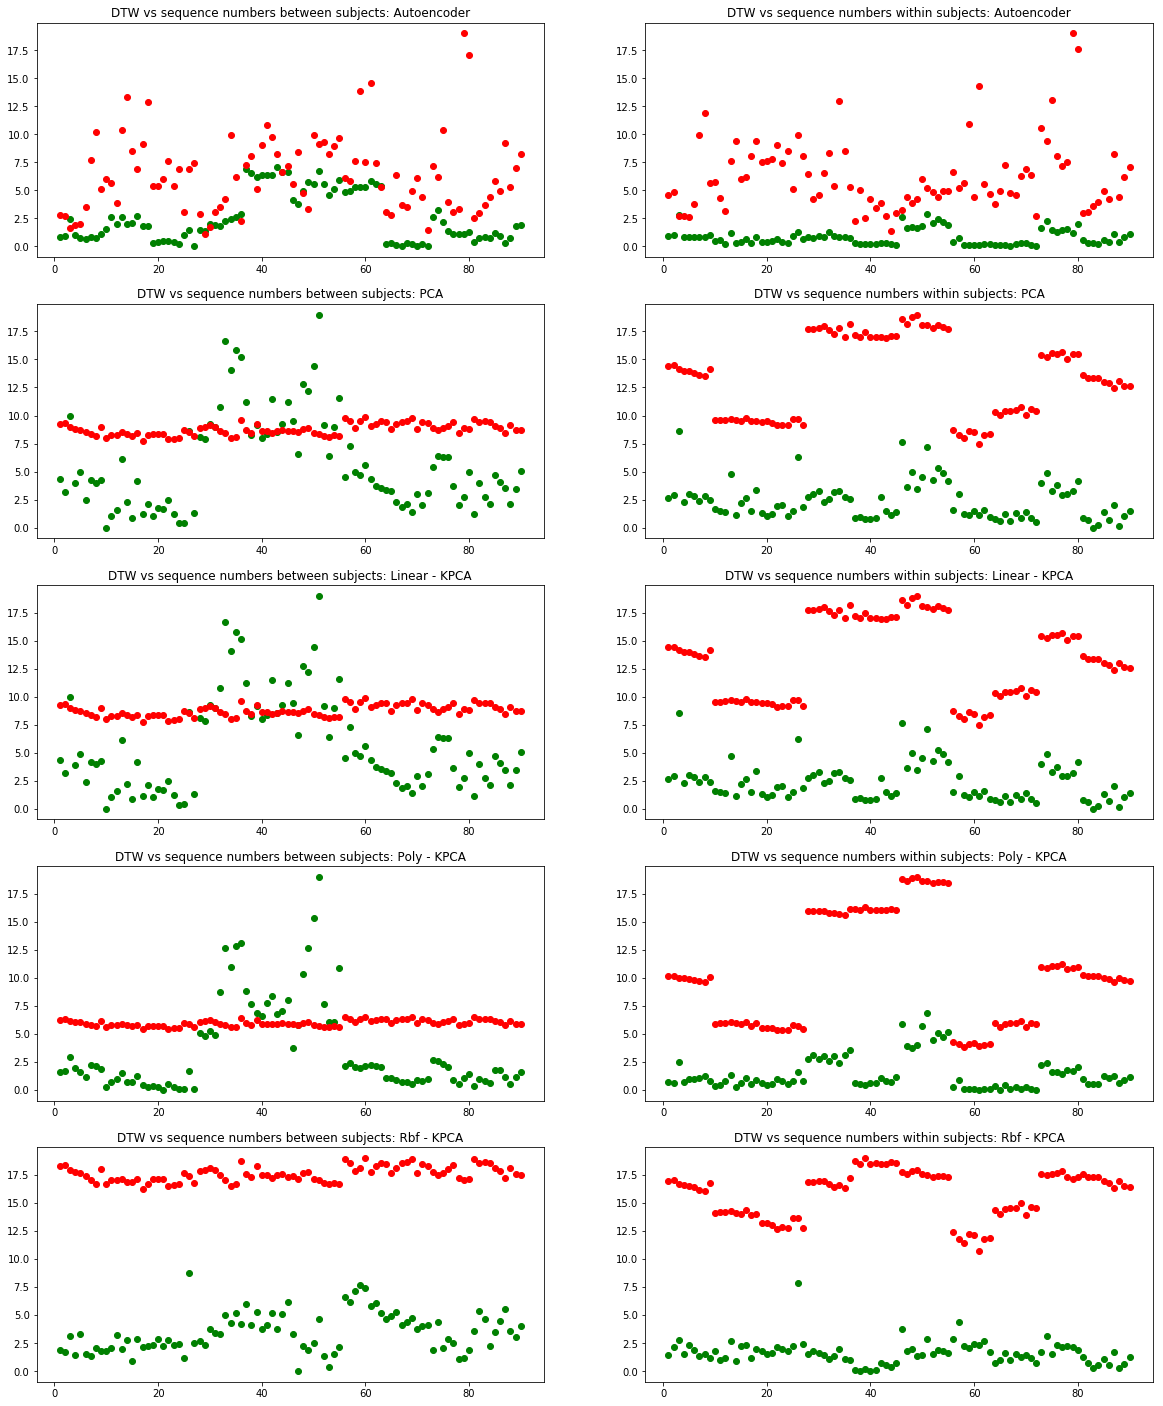

In [226]:
#Input files for different methods

plt.figure(figsize = (20,25))

filepath_train_bw = "Data/DTW_bw_AE_correct.csv"
filepath_test_bw = "Data/DTW_bw_AE_incorrect.csv"
filepath_train_with = "Data/DTW_with_AE_correct.csv"
filepath_test_with = "Data/DTW_with_AE_incorrect.csv"
inp = "Autoencoder"
i = 1
main(filepath_train_bw,filepath_test_bw,filepath_train_with,filepath_test_with,inp,i)

filepath_train_bw = "Data/DTW_bw_PCA_correct.csv"
filepath_test_bw = "Data/DTW_bw_PCA_incorrect.csv"
filepath_train_with = "Data/DTW_with_PCA_correct.csv"
filepath_test_with = "Data/DTW_with_PCA_incorrect.csv"
inp = "PCA"
i = i + 2
main(filepath_train_bw,filepath_test_bw,filepath_train_with,filepath_test_with,inp,i)

filepath_train_bw = "Data/DTW_bw_linear_correct.csv"
filepath_test_bw = "Data/DTW_bw_linear_incorrect.csv"
filepath_train_with = "Data/DTW_with_linear_correct.csv"
filepath_test_with = "Data/DTW_with_linear_incorrect.csv"
inp = "Linear - KPCA"
i = i + 2
main(filepath_train_bw,filepath_test_bw,filepath_train_with,filepath_test_with,inp,i)

filepath_train_bw = "Data/DTW_bw_poly_correct.csv"
filepath_test_bw = "Data/DTW_bw_poly_incorrect.csv"
filepath_train_with = "Data/DTW_with_poly_correct.csv"
filepath_test_with = "Data/DTW_with_poly_incorrect.csv"
inp = "Poly - KPCA"
i = i + 2
main(filepath_train_bw,filepath_test_bw,filepath_train_with,filepath_test_with,inp,i)

filepath_train_bw = "Data/DTW_bw_rbf_correct.csv"
filepath_test_bw = "Data/DTW_bw_rbf_incorrect.csv"
filepath_train_with = "Data/DTW_with_rbf_correct.csv"
filepath_test_with = "Data/DTW_with_rbf_incorrect.csv"
inp = "Rbf - KPCA"
i = i + 2
main(filepath_train_bw,filepath_test_bw,filepath_train_with,filepath_test_with,inp,i)

plt.show()
